In [1]:
import ARESlatticeStage3v1_9 as ares
import cheetah
import matplotlib.pyplot as plt
import ocelot.adaptors.astra2ocelot as oca

math_op.py: module Numba is not installed. Install it if you want speed up correlation calculations


[INFO    ] : : beam.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] : : high_order.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] : : : : : : : : : : : radiation_py.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.
[INFO    ] csr.py: module NUMEXPR is not installed. Install it to speed up calculation
[INFO    ] wake3D.py: module NUMBA is not installed. Install it to speed up calculation


initializing ocelot...
import: module NUMBA is not installed. Install it to speed up calculation
import: module PYFFTW is not installed. Install it to speed up calculation
import: module NUMEXPR is not installed. Install it to speed up calculation


In [2]:
cell = cheetah.utils.subcell_of_ocelot(ares.cell, "AREASOLA1", "ARMRBSCR1")
segment = cheetah.Segment.from_ocelot(cell)

In [3]:
for element in segment.elements:
    if isinstance(element, cheetah.Screen):
        print(element)

Screen(resolution=(2448, 2040), pixel_size=(3.5488e-06, 2.5003e-06), binning=1, misalignment=(0, 0), name="AREABSCR1")
Screen(resolution=(2448, 2040), pixel_size=(3.5488e-06, 2.5003e-06), binning=1, misalignment=(0, 0), name="ARMRBSCR1")


In [4]:
# segment.AREABSCR1.resoltuion = ?
# segment.AREABSCR1.pixel_size = ?
segment.ARMRBSCR1.resolution = (2448, 2040)
segment.ARMRBSCR1.pixel_size = (3.5488e-6, 2.5003e-6)
segment.ARMRBSCR1.binning = 4

In [5]:
for element in segment.elements:
    if isinstance(element, cheetah.Screen):
        print(element)

Screen(resolution=(2448, 2040), pixel_size=(3.5488e-06, 2.5003e-06), binning=1, misalignment=(0, 0), name="AREABSCR1")
Screen(resolution=(2448, 2040), pixel_size=(3.5488e-06, 2.5003e-06), binning=4, misalignment=(0, 0), name="ARMRBSCR1")


In [6]:
segment.ARMRBSCR1.extent

(-0.0043437312, 0.0043437312, -0.002550306, 0.002550306)

In [7]:
# particles = cheetah.random_particles(n=int(1e+5), sigma_x=175e-6, sigma_y=175e-6, sigma_p=0.0)
p_array_astra = oca.astraBeam2particleArray("ACHIP_EA1_2021.1351.001")
beam = cheetah.ParticleBeam.from_ocelot(p_array_astra)

Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  13.50890653269  m


In [8]:
segment.AREAMQZM1.k1 = 4.13 # -0.9964350504414721
segment.AREAMQZM2.k1 = -6.93 # -3.6658567102988844
segment.AREAMQZM3.k1 = 2.99 # 5.203214488709113
# segment.AREAMCVM1.angle = 0
# segment.AREAMCHM1.angle = 1e-3
segment.ARMRBSCR1.is_active = True

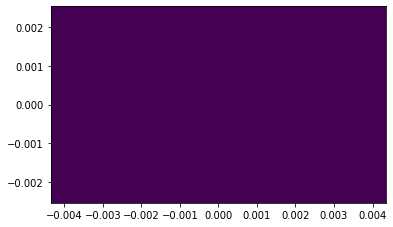

In [9]:
plt.imshow(segment.ARMRBSCR1.reading, interpolation="None", extent=segment.ARMRBSCR1.extent)
plt.show()

In [10]:
segment(beam)

"I'm an empty beam!"

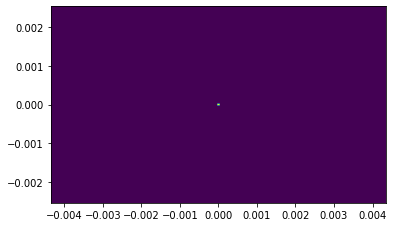

In [11]:
plt.imshow(segment.ARMRBSCR1.reading, interpolation="None", extent=segment.ARMRBSCR1.extent)
plt.show()

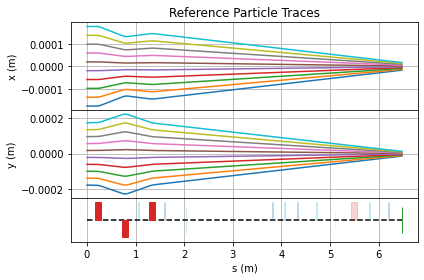

In [12]:
segment.plot_overview(beam=beam)

In [13]:
segment.AREABSCR1.is_active = True

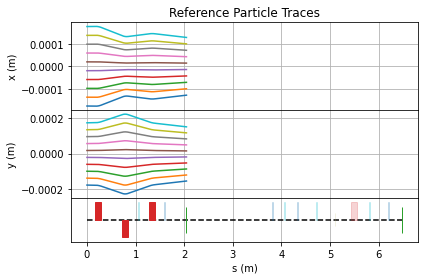

In [14]:
segment.plot_overview(beam=beam)